### Tutorial 5: Calculating equilibrium compositions for an O<sub>2</sub> plasma

Calculations for plasmas consisting of species of a single element are a useful starting point because they are simple examples to illustrate the functionality of minplascalc, and their experimental and theoretical/calculated properties are very well documented in literature; they therefore make useful validation cases.

In order to define a plasma mixture in minplascalc, the user must specify all species present in the plasma as well as a composition constraint - this is typically given as the composition (in mole fractions) of the plasma-generating gas at low temperatures. Note that the list of species does not include electrons, which are automatically assumed to be present in any plasma.

Let's look at the case of an oxygen plasma, which includes species O<sub>2</sub>, O<sub>2</sub><sup>+</sup>, O, O<sup>+</sup>, and O<sup>2+</sup>. We specify the composition constraint as a mole fraction of 1 for O<sub>2</sub> and zero for all the others, since the plasma originates from a pure oxygen gas at room temperature. Note that in this case, any set of initial mole fractions of the various species will give the same result provided they sum to unity - this is because oxygen is the only element present in the plasma. 

In order to calculate the composition of the plasma at various temperatures using these species, execute the following code snippets in order. The text in between indicates what each part of the code is doing.

We start off by importing the modules we need - matplotlib for drawing graphs, numpy for array functions, and minplascalc itself.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy
import minplascalc as mpc

Then, we create a list of Species objects for the species we want, as well as a list of the initial mole fractions.

In [2]:
species = [mpc.species.from_name(sp) for sp in ['O2','O2+','O','O+','O++']]
x0 = [1, 0, 0, 0, 0]

Next, we create a minplascalc Mixture object from the data above. The temperature in K and pressure in Pa are given to the constructor too, and attributes T and P will be initialised to those values. When using the raw Mixture constructor we must also provide some control information for the Gibbs free energy solver.

In [3]:
mixture = mpc.mixture.Mixture(species, x0, T=1000, P=101325, gfe_ni0=1e20, gfe_reltol=1e-10, gfe_maxiter=1000)

Next, set a range of temperatures to calculate the equilibrium compositions at - in this case we're going from 1000 to 25000 K in 100 steps. Also initialise a list to store the composition result at each temperature

In [4]:
temperatures = numpy.linspace(1000, 25000, 100)
speciesnames = [sp.name for sp in mixture.species]
ni = []

Now we're ready to actually perform the composition calculations. We loop over all the temperatures, setting the mixture object's temperature attribute to the appropriate value and calculating the LTE composition using the object's <span style="font-family: 'Courier';">calculate_composition()</span> function. Note that execution of this calculation is fairly compute intensive and the following code snippet may take a few seconds to complete.

In [5]:
for T in temperatures:
    mixture.T = T
    ni.append(mixture.calculate_composition())

Now we can visualise the results by plotting the plasma composition against temperature, to see how it varies.

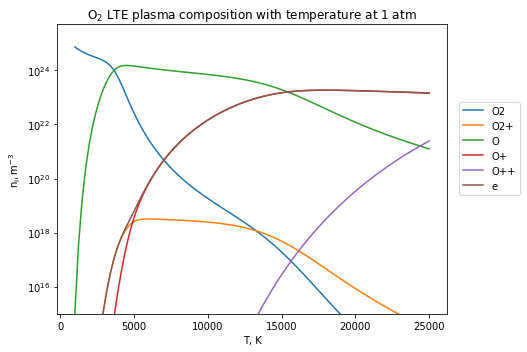

In [6]:
ni = numpy.array(ni).transpose()

fig, ax0 = plt.subplots(1, 1, figsize=(7.5, 5))
ax0.set_title('$\mathregular{O_2}$ LTE plasma composition with temperature at 1 atm')
ax0.set_xlabel('T, K')
ax0.set_ylabel('$\mathregular{n_i, m^{-3}}$')
ax0.set_ylim(1e15, 5e25)
for spn, sn in zip(ni, speciesnames):
    ax0.semilogy(temperatures, spn, label=sn);
ax0.legend(bbox_to_anchor=(1.2, 0.75));
plt.tight_layout()

The results obtained using minplascalc compare favourably with calculations by other authors, for example Boulos et al 1994 (see README for full reference). Some small deviations occur at very low concentration levels, but the impact of these low-concentration species on actual plasma behaviour is expected to be small since their concentrations are more than six orders of magnitude lower than the dominant components.